In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel('C:/Users/Patyc/OneDrive/Desktop/Dissertation/Data/Skin_clean and treated/Skin_clean_location.xlsx')
df['Location'] = df['Location'].str.strip()
df.loc[df['Location'].eq('Faro') & df['Screening_date'].eq('2022-08-13'), 'Screening_date'] = '2022-08-14'
df.loc[df['Location'].eq('Lisboa') & df['Screening_date'].eq('2023-05-15'), 'Screening_date'] = '2023-05-19'

df.head()

,Location,Screening_date,Gender,Age,Personal_cancer_history,Family_cancer_history,Sun_exposure,Body_signs,Premalignant,Malignant,Phototype_2,Phototype_3,Phototype_4,Phototype_5,Phototype_6
0,Abrantes,2022-07-23,1.0,53.0,0.0,1.0,1.0,1.0,1,0,1,0,0,0,0
1,Abrantes,2022-07-23,1.0,35.0,0.0,1.0,1.0,1.0,1,0,0,1,0,0,0
2,Abrantes,2022-07-23,1.0,47.0,0.0,1.0,0.0,0.0,0,0,0,1,0,0,0
3,Abrantes,2022-07-23,1.0,54.0,0.0,1.0,0.0,1.0,0,0,0,0,1,0,0
4,Abrantes,2022-07-23,1.0,71.0,1.0,1.0,0.0,1.0,1,0,0,1,0,0,0


In [3]:
## Converter a data para datetime e ordenar de forma crescente
df['Screening_date'] = pd.to_datetime(df['Screening_date'])
df = df.sort_values(by='Screening_date')

In [4]:
# Iterar sobre cada data única no DataFrame
for date in df['Screening_date'].unique():
    # Filtrar o DataFrame para a data atual
    date_mask = df['Screening_date'] == date
    df_date = df[date_mask]
    
    # Preencher valores ausentes
    for column in df_date.columns:
        if column != 'Screening_date':  # Ignorar a coluna de data
            if pd.api.types.is_numeric_dtype(df_date[column]):
                # Verifica se a coluna tem valores não NaN antes de calcular a mediana
                if df_date[column].notna().any():
                    df.loc[date_mask, column] = df_date[column].fillna(df_date[column].median())
                else:
                    # Se todos os valores são NaN, preenche com a mediana global da coluna
                    df.loc[date_mask, column] = df_date[column].fillna(df[column].median())
            else:
                # Verifica se a coluna tem valores não NaN antes de calcular a moda
                if df_date[column].notna().any():
                    df.loc[date_mask, column] = df_date[column].fillna(df_date[column].mode().iloc[0])
                else:
                    # Se todos os valores são NaN, preenche com a moda global da coluna
                    if not df[column].mode().empty:
                        df.loc[date_mask, column] = df_date[column].fillna(df[column].mode().iloc[0])
                    else:
                        df.loc[date_mask, column] = df_date[column].fillna('Desconhecido')  # Ou outro valor padrão

print(df)

print(df.columns)

     Location Screening_date  Gender   Age  Personal_cancer_history  \
5901   Tavira     2022-03-03     1.0  59.0                      0.0   
5895   Tavira     2022-03-03     0.0  59.0                      0.0   
5896   Tavira     2022-03-03     1.0  59.0                      0.0   
5897   Tavira     2022-03-03     0.0  59.0                      0.0   
5898   Tavira     2022-03-03     1.0  59.0                      0.0   
...       ...            ...     ...   ...                      ...   
4481    Ourém     2024-04-27     0.0  23.0                      0.0   
4480    Ourém     2024-04-27     1.0  81.0                      1.0   
4479    Ourém     2024-04-27     1.0  59.0                      1.0   
8049    Ourém     2024-04-27     1.0  63.0                      0.0   
4436    Ourém     2024-04-27     1.0  60.0                      0.0   

      Family_cancer_history  Sun_exposure  Body_signs  Premalignant  \
5901                    1.0           1.0         1.0             0   
5895 

In [5]:
# Agrupamento e agregação mantendo todas as colunas
d1 = df.groupby(['Location', 'Screening_date'], as_index=False).agg({
    'Gender': lambda x: x.mode()[0],
    'Age': 'median',
    'Personal_cancer_history': lambda x: x.mode()[0],  # Valor mais frequente
    'Family_cancer_history': lambda x: x.mode()[0],    # Valor mais frequente
    'Sun_exposure': lambda x: x.mode()[0],             # Valor mais frequente
    'Body_signs': lambda x: x.mode()[0],               # Valor mais frequente
    'Premalignant': lambda x: x.mode()[0],             # Valor mais frequente
    'Malignant': lambda x: x.mode()[0],                # Valor mais frequente
    'Phototype_2': lambda x: x.mode()[0],              # Valor mais frequente
    'Phototype_3': lambda x: x.mode()[0],              # Valor mais frequente
    'Phototype_4': lambda x: x.mode()[0],              # Valor mais frequente
    'Phototype_5': lambda x: x.mode()[0],              # Valor mais frequente
    'Phototype_6': lambda x: x.mode()[0],              # Valor mais frequente
    'Location': 'first'                                # Mantém o nome da localização
})

# Criando a coluna 'size' com o número de ocorrências para cada Location e Screening_date
d1['size'] = df.groupby(['Location', 'Screening_date']).size().values

# Ordenar os resultados
d1 = d1.sort_values(['Location', 'Screening_date'])

# Exibir o DataFrame resultante
print(d1)

print(d1.columns)

   Screening_date  Gender   Age  Personal_cancer_history  \
0      2024-03-23     1.0  61.5                      0.0   
1      2022-07-23     1.0  52.0                      0.0   
2      2022-10-01     1.0  62.0                      0.0   
3      2023-06-29     1.0  59.0                      0.0   
4      2023-12-02     1.0  54.0                      0.0   
..            ...     ...   ...                      ...   
94     2022-09-24     1.0  59.0                      0.0   
95     2024-03-16     1.0  62.0                      0.0   
96     2022-08-20     1.0  59.0                      0.0   
97     2022-10-22     1.0  59.0                      0.0   
98     2023-09-02     1.0  59.0                      0.0   

    Family_cancer_history  Sun_exposure  Body_signs  Premalignant  Malignant  \
0                     0.0           0.0         0.0             0          0   
1                     1.0           0.0         1.0             0          0   
2                     0.0           1.0

In [6]:
# Contagem de triagens por localização
d2 = d1.assign(count=d1.groupby(['Location'])['Location'].transform('count'))

# Filtragem para manter apenas localizações com mais de uma triagem
d2 = d2[d2['count'].ne(1)]

# Cálculo de ndays e nscreens
d2['ndays'] = d2.groupby('Location')['Screening_date'].diff()
d2['nscreens'] = d2['size'].values / d2['ndays'].dt.days  # Usando a coluna 'Location' para representar 'size'

# Exibir o resultado final
print(d2)

   Screening_date  Gender   Age  Personal_cancer_history  \
1      2022-07-23     1.0  52.0                      0.0   
2      2022-10-01     1.0  62.0                      0.0   
3      2023-06-29     1.0  59.0                      0.0   
4      2023-12-02     1.0  54.0                      0.0   
5      2023-01-21     1.0  68.0                      0.0   
6      2023-04-22     1.0  57.0                      0.0   
7      2022-07-05     1.0  61.5                      0.0   
8      2023-06-15     1.0  58.0                      0.0   
10     2022-10-29     1.0  64.0                      0.0   
11     2023-11-11     1.0  60.0                      0.0   
22     2022-07-04     1.0  55.0                      0.0   
23     2023-05-27     1.0  65.0                      0.0   
25     2022-05-28     1.0  58.0                      0.0   
26     2023-10-28     1.0  61.0                      0.0   
27     2023-02-04     0.0  58.5                      0.0   
28     2023-08-05     1.0  59.0         

In [7]:
print(d2.columns)

Index(['Screening_date', 'Gender', 'Age', 'Personal_cancer_history',
       'Family_cancer_history', 'Sun_exposure', 'Body_signs', 'Premalignant',
       'Malignant', 'Phototype_2', 'Phototype_3', 'Phototype_4', 'Phototype_5',
       'Phototype_6', 'Location', 'size', 'count', 'ndays', 'nscreens'],
      dtype='object')


In [8]:
date_range = pd.date_range(start='2022-03-03', end='2024-04-20') #datas mais extremas no dataset

datesdf = pd.DataFrame(date_range, columns=['Screening_date'])

list_dfs = []

groups = d2.groupby('Location')

for _, group in groups:
    list_dfs.append(datesdf.merge(group, how='left').bfill().ffill())

d3 = pd.concat(list_dfs)
# d3

In [9]:
print(d3.columns)

Index(['Screening_date', 'Gender', 'Age', 'Personal_cancer_history',
       'Family_cancer_history', 'Sun_exposure', 'Body_signs', 'Premalignant',
       'Malignant', 'Phototype_2', 'Phototype_3', 'Phototype_4', 'Phototype_5',
       'Phototype_6', 'Location', 'size', 'count', 'ndays', 'nscreens'],
      dtype='object')


In [10]:
# Configurar pandas para exibir todos os valores sem truncamento
pd.set_option('display.max_columns', None)    # Mostra todas as colunas

# Iterar sobre cada coluna em d3 e imprimir os valores únicos
for column in d3.columns:
    unique_values = d3[column].unique()
    print(f"Coluna: {column}")
    print(f"Valores únicos: {unique_values}\n")


Coluna: Screening_date
Valores únicos: <DatetimeArray>
['2022-03-03 00:00:00', '2022-03-04 00:00:00', '2022-03-05 00:00:00',
 '2022-03-06 00:00:00', '2022-03-07 00:00:00', '2022-03-08 00:00:00',
 '2022-03-09 00:00:00', '2022-03-10 00:00:00', '2022-03-11 00:00:00',
 '2022-03-12 00:00:00',
 ...
 '2024-04-11 00:00:00', '2024-04-12 00:00:00', '2024-04-13 00:00:00',
 '2024-04-14 00:00:00', '2024-04-15 00:00:00', '2024-04-16 00:00:00',
 '2024-04-17 00:00:00', '2024-04-18 00:00:00', '2024-04-19 00:00:00',
 '2024-04-20 00:00:00']
Length: 780, dtype: datetime64[ns]

Coluna: Gender
Valores únicos: [1. 0.]

Coluna: Age
Valores únicos: [52.  62.  59.  54.  68.  57.  61.5 58.  64.  60.  55.  65.  61.  58.5
 71.  63.5 53.  64.5 67.  63.  38.5 54.5 49. ]

Coluna: Personal_cancer_history
Valores únicos: [0.]

Coluna: Family_cancer_history
Valores únicos: [1. 0.]

Coluna: Sun_exposure
Valores únicos: [0. 1.]

Coluna: Body_signs
Valores únicos: [1. 0.]

Coluna: Premalignant
Valores únicos: [0.]

Coluna:

In [11]:
# Agrupar por 'Screening_date' e calcular a soma de 'nscreens' para cada data (ou use outra função agregada como média)
d4 = d3.groupby('Screening_date', as_index=False)['nscreens'].sum()

# Exibir o resultado final
print(d4)


    Screening_date   nscreens
0       2022-03-03  11.169861
1       2022-03-04  11.169861
2       2022-03-05  11.169861
3       2022-03-06  11.169861
4       2022-03-07  11.169861
..             ...        ...
775     2024-04-16  12.874846
776     2024-04-17  12.874846
777     2024-04-18  12.874846
778     2024-04-19  12.874846
779     2024-04-20  12.874846

[780 rows x 2 columns]


In [12]:
d4

,Screening_date,nscreens
0,2022-03-03,11.169861
1,2022-03-04,11.169861
2,2022-03-05,11.169861
3,2022-03-06,11.169861
4,2022-03-07,11.169861
...,...,...
775,2024-04-16,12.874846
776,2024-04-17,12.874846
777,2024-04-18,12.874846
778,2024-04-19,12.874846


d4 mostra o número total de triagens por dia considerando todas as localizações

In [13]:
# Agrupamento e agregação mantendo todas as colunas, exceto Location e size
d5 = d3.groupby('Screening_date', as_index=False).agg({
    'Gender': lambda x: x.mode()[0],  # Valor mais frequente
    'Age': 'median',  # Mediana das idades
    'Personal_cancer_history': lambda x: x.mode()[0],  # Valor mais frequente
    'Family_cancer_history': lambda x: x.mode()[0],    # Valor mais frequente
    'Sun_exposure': lambda x: x.mode()[0],             # Valor mais frequente
    'Body_signs': lambda x: x.mode()[0],               # Valor mais frequente
    'Premalignant': lambda x: x.mode()[0],             # Valor mais frequente
    'Malignant': lambda x: x.mode()[0],                # Valor mais frequente
    'Phototype_2': lambda x: x.mode()[0],              # Valor mais frequente
    'Phototype_3': lambda x: x.mode()[0],              # Valor mais frequente
    'Phototype_4': lambda x: x.mode()[0],              # Valor mais frequente
    'Phototype_5': lambda x: x.mode()[0],              # Valor mais frequente
    'Phototype_6': lambda x: x.mode()[0],              # Valor mais frequente
    'nscreens': 'sum'                                  # Soma dos valores de nscreens
})

# Exibir o DataFrame resultante
print(d5)

print(d5.columns)


    Screening_date  Gender   Age  Personal_cancer_history  \
0       2022-03-03     1.0  59.0                      0.0   
1       2022-03-04     1.0  59.0                      0.0   
2       2022-03-05     1.0  59.0                      0.0   
3       2022-03-06     1.0  59.0                      0.0   
4       2022-03-07     1.0  59.0                      0.0   
..             ...     ...   ...                      ...   
775     2024-04-16     1.0  59.0                      0.0   
776     2024-04-17     1.0  59.0                      0.0   
777     2024-04-18     1.0  59.0                      0.0   
778     2024-04-19     1.0  59.0                      0.0   
779     2024-04-20     1.0  59.0                      0.0   

     Family_cancer_history  Sun_exposure  Body_signs  Premalignant  Malignant  \
0                      0.0           1.0         1.0           0.0        0.0   
1                      0.0           1.0         1.0           0.0        0.0   
2                      0

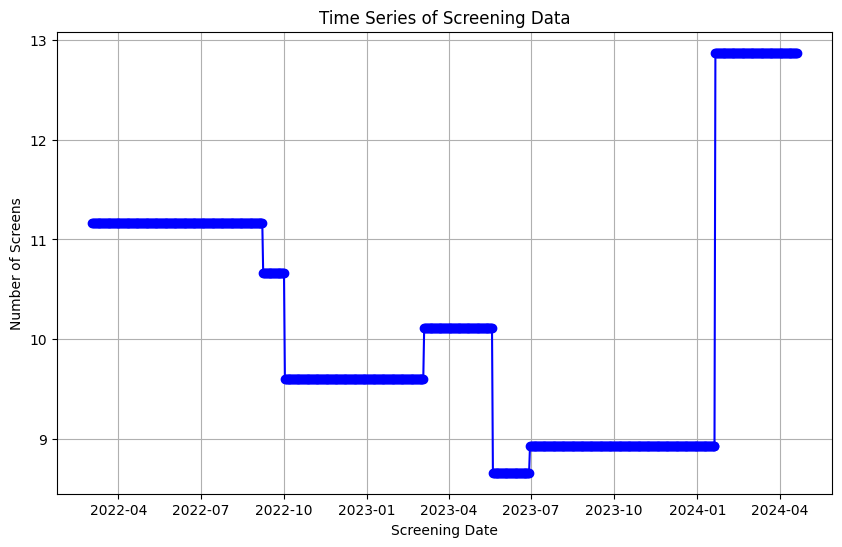

In [14]:
import matplotlib.pyplot as plt # type: ignore

# Supondo que 'd5' seja um DataFrame onde 'Screening_date' é a coluna de datas e 'nscreens' é a variável que você deseja plotar
plt.figure(figsize=(10, 6))
plt.plot(d5['Screening_date'], d5['nscreens'], marker='o', linestyle='-', color='b')
plt.title('Time Series of Screening Data')
plt.xlabel('Screening Date')
plt.ylabel('Number of Screens')
plt.grid(True)
plt.show()

In [15]:
from statsmodels.tsa.stattools import adfuller

# Realizar o teste ADF na coluna 'total_screenings_per_week'
adf_result = adfuller(d5['nscreens'].dropna())

# Exibir os resultados do teste
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
print('Critical Values:')
for key, value in adf_result[4].items():
    print(f'   {key}: {value}')

ADF Statistic: -1.1583735563439237
p-value: 0.6912413038161388
Critical Values:
   1%: -3.4387723094153286
   5%: -2.8652573313919625
   10%: -2.5687494684274794


# NORMALIZAÇÃO - X e y

GLM (Kernel), SVR (Gaussian Kernel), SVR (Linear Kernel), MLP NN, LSTM, e CNN

In [16]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Supondo que você já tenha um DataFrame chamado 'df'
# Criando o scaler
scaler = MinMaxScaler()

d5['Age'] = scaler.fit_transform(d5[['Age']])

# Definir as features (X) e a variável target (y)
X = d5.drop(columns=['nscreens', 'Screening_date'])
y = d5['nscreens'].values

# SEM NORMALIZAÇÃO - X e y

MLR, GLM GAUSSIAN, XGB

In [17]:
# Separação de X e y
X = d5.drop(columns=['nscreens', 'Screening_date'])
y = d5['nscreens'].values

In [18]:
from sklearn.model_selection import train_test_split # type: ignore
 
# # Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [19]:
# Supondo que sua coluna 'Screening_date' esteja no formato de data
d5['Screening_date'] = pd.to_datetime(d5['Screening_date'])

# Definindo a data de corte
cutoff_date = pd.to_datetime('2024-03-01')

# Criando os conjuntos de treinamento e teste com base na data
X_train = d5[d5['Screening_date'] <= cutoff_date].drop(columns=['nscreens', 'Screening_date'])
y_train = d5[d5['Screening_date'] <= cutoff_date]['nscreens'].values

X_test = d5[d5['Screening_date'] > cutoff_date].drop(columns=['nscreens', 'Screening_date'])
y_test = d5[d5['Screening_date'] > cutoff_date]['nscreens'].values

In [20]:
# Contar o número de elementos em y_train e y_test
num_y_train = len(y_train)
num_y_test = len(y_test)

print(f"Número de elementos em y_train: {num_y_train}")
print(f"Número de elementos em y_test: {num_y_test}")


Número de elementos em y_train: 730
Número de elementos em y_test: 50


# MODELO MLR

In [21]:
from sklearn.linear_model import LinearRegression # type: ignore
import statsmodels.api as sm # type: ignore
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score # type: ignore


In [60]:
# Adicionar uma constante aos dados de treinamento
X_train_sm = sm.add_constant(X_train)

# Certifique-se de que a ordem das colunas em X_test é a mesma que em X_train antes de adicionar a constante
X_test_sm = X_test[X_train.columns]  # Garante a mesma ordem das colunas
X_test_sm = sm.add_constant(X_test_sm)  # Adiciona a constante

print(X_train_sm.head())
print(X_test_sm.head())

# Ajustar o modelo
model_sm = sm.OLS(y_train, X_train_sm).fit()

# # Obter o resumo do modelo
# print(model_sm.summary())

# Fazer previsões no conjunto de teste
y_pred = model_sm.predict(X_test_sm)

# Calcular e imprimir as métricas de avaliação
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
me = np.mean(y_test - y_pred)
mav = np.mean(np.abs(y_test))
mpv = np.mean(np.abs((y_test - y_pred) / y_test))
rme = np.mean((y_test - y_pred) / y_test)
rmae = np.mean(np.abs(y_test - y_pred) / np.abs(y_test))

   Gender   Age  Personal_cancer_history  Family_cancer_history  Sun_exposure  \
0     1.0  59.0                      0.0                    0.0           1.0   
1     1.0  59.0                      0.0                    0.0           1.0   
2     1.0  59.0                      0.0                    0.0           1.0   
3     1.0  59.0                      0.0                    0.0           1.0   
4     1.0  59.0                      0.0                    0.0           1.0   

   Body_signs  Premalignant  Malignant  Phototype_2  Phototype_3  Phototype_4  \
0         1.0           0.0        0.0          0.0          0.0          0.0   
1         1.0           0.0        0.0          0.0          0.0          0.0   
2         1.0           0.0        0.0          0.0          0.0          0.0   
3         1.0           0.0        0.0          0.0          0.0          0.0   
4         1.0           0.0        0.0          0.0          0.0          0.0   

   Phototype_5  Phototype_

In [61]:
print("Modelo: LR")
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R2: {r2}')
print(f'ME: {me}')
print(f'MAV: {mav}')
print(f'MPV: {mpv}')
print(f'RME: {rme}')
print(f'RMAE: {rmae}')

# Modelo: LR shuffle
# MAE: 2.130769417981584
# MSE: 5.389105642846881
# RMSE: 2.3214447318096725
# R2: -0.4210330670475875
# ME: 1.263613797862408
# MAV: 11.228988121444878
# MPV: 0.1804035907789113
# RME: 0.08324098467757482
# RMAE: 0.1804035907789113

# Modelo: LR split
# MAE: 2.8387176483139105
# MSE: 8.058317886848855
# RMSE: 2.8387176483139096
# R2: 0.0
# ME: 2.8387176483139105
# MAV: 12.874845651448748
# MPV: 0.2204855673741209
# RME: 0.2204855673741209
# RMAE: 0.2204855673741209

Modelo: LR
MAE: 2.8387176483139105
MSE: 8.058317886848855
RMSE: 2.8387176483139096
R2: 0.0
ME: 2.8387176483139105
MAV: 12.874845651448748
MPV: 0.2204855673741209
RME: 0.2204855673741209
RMAE: 0.2204855673741209


# MODELO GLM

Gaussian

In [22]:
from statsmodels.genmod.generalized_linear_model import GLM # type: ignore
from statsmodels.genmod.families import Gaussian # type: ignore
from sklearn.preprocessing import PolynomialFeatures # type: ignore

### Gaussian ###


In [75]:
# Supondo que sua coluna 'Screening_date' esteja no formato de data
d5['Screening_date'] = pd.to_datetime(d5['Screening_date'])

# Definindo a data de corte
cutoff_date = pd.to_datetime('2024-03-01')

# Criando os conjuntos de treinamento e teste com base na data
X_train = d5[d5['Screening_date'] <= cutoff_date].drop(columns=['nscreens', 'Screening_date'])
y_train = d5[d5['Screening_date'] <= cutoff_date]['nscreens'].values

X_test = d5[d5['Screening_date'] > cutoff_date].drop(columns=['nscreens', 'Screening_date'])
y_test = d5[d5['Screening_date'] > cutoff_date]['nscreens'].values

In [76]:
# Adicionar uma constante aos dados de treinamento
X_train_sm = sm.add_constant(X_train)

# Certifique-se de que a ordem das colunas em X_test é a mesma que em X_train antes de adicionar a constante
X_test_sm = X_test[X_train.columns]  # Garante a mesma ordem das colunas
X_test_sm = sm.add_constant(X_test_sm)  # Adiciona a constante

# print(X_train_sm.head())
# print(X_test_sm.head())

# Ajustar o modelo GLM com família Gaussian
model_glm = GLM(y_train, X_train_sm, family=Gaussian()).fit()

# # Obter o resumo do modelo
# print(model_glm.summary())

# Fazer previsões no conjunto de teste
y_pred = model_glm.predict(X_test_sm)

# Calcular e imprimir as métricas de avaliação
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
me = np.mean(y_test - y_pred)
mav = np.mean(np.abs(y_test))
mpv = np.mean(np.abs((y_test - y_pred) / y_test))
rme = np.mean((y_test - y_pred) / y_test)
rmae = np.mean(np.abs(y_test - y_pred) / np.abs(y_test))


In [77]:
print("Modelo: GLM com Gaussian")
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R2: {r2}')
print(f'ME: {me}')
print(f'MAV: {mav}')
print(f'MPV: {mpv}')
print(f'RME: {rme}')
print(f'RMAE: {rmae}')

# Modelo: GLM com Gaussian shuffle
# MAE: 2.130769417981584
# MSE: 5.389105642846881
# RMSE: 2.3214447318096725
# R2: -0.4210330670475875
# ME: 1.263613797862408
# MAV: 11.228988121444878
# MPV: 0.1804035907789113
# RME: 0.08324098467757482
# RMAE: 0.1804035907789113

# Modelo: GLM com Gaussian split
# MAE: 2.8387176483139105
# MSE: 8.058317886848855
# RMSE: 2.8387176483139096
# R2: 0.0
# ME: 2.8387176483139105
# MAV: 12.874845651448748
# MPV: 0.2204855673741209
# RME: 0.2204855673741209
# RMAE: 0.2204855673741209



Modelo: GLM com Gaussian
MAE: 2.8387176483139105
MSE: 8.058317886848855
RMSE: 2.8387176483139096
R2: 0.0
ME: 2.8387176483139105
MAV: 12.874845651448748
MPV: 0.2204855673741209
RME: 0.2204855673741209
RMAE: 0.2204855673741209


Kernel

In [48]:
# Definir o grau do polinômio
degree = 2

# Criar o transformador polinomial
poly = PolynomialFeatures(degree)

# Ajustar e transformar os dados de treino
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Adicionar uma constante aos dados transformados
X_train_poly_sm = sm.add_constant(X_train_poly)
X_test_poly_sm = sm.add_constant(X_test_poly)

# print(X_train_poly_sm)
# print(X_test_poly_sm)

# Ajustar o modelo GLM com família Gaussian
model_glm = GLM(y_train, X_train_poly_sm, family=Gaussian()).fit()

# # Obter o resumo do modelo
# print(model_glm.summary())

# Fazer previsões no conjunto de teste
y_pred = model_glm.predict(X_test_poly_sm)

# Calcular e imprimir as métricas de avaliação
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
me = np.mean(y_test - y_pred)
mav = np.mean(np.abs(y_test))
mpv = np.mean(np.abs((y_test - y_pred) / y_test))
rme = np.mean((y_test - y_pred) / y_test)
rmae = np.mean(np.abs(y_test - y_pred) / np.abs(y_test))

print("Modelo: GLM com Kernel Polinomial")
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R2: {r2}')
print(f'ME: {me}')
print(f'MAV: {mav}')
print(f'MPV: {mpv}')
print(f'RME: {rme}')
print(f'RMAE: {rmae}')

# Modelo: GLM com Kernel Polinomial shuffle
# MAE: 2.130769417981596
# MSE: 5.3891056428470465
# RMSE: 2.321444731809708
# R2: -0.421033067047631
# ME: 1.2636137978624744
# MAV: 11.228988121444878
# MPV: 0.18040359077891124
# RME: 0.08324098467758091
# RMAE: 0.18040359077891124

# Modelo: GLM com Kernel Polinomial
# MAE: 2.838717648313992
# MSE: 8.05831788684932
# RMSE: 2.8387176483139918
# R2: 0.0
# ME: 2.838717648313992
# MAV: 12.874845651448748
# MPV: 0.2204855673741272
# RME: 0.2204855673741272
# RMAE: 0.2204855673741272


Modelo: GLM com Kernel Polinomial
MAE: 2.838717648313942
MSE: 8.058317886849037
RMSE: 2.838717648313942
R2: 0.0
ME: 2.838717648313942
MAV: 12.874845651448748
MPV: 0.22048556737412334
RME: 0.22048556737412334
RMAE: 0.22048556737412334


# MODELO SVR

Kernel Gaussiano

In [49]:
from sklearn.svm import SVR # type: ignore
from sklearn.preprocessing import StandardScaler # type: ignore

# Normalizar a coluna 'Age'
scaler = StandardScaler()
X_train['Age'] = scaler.fit_transform(X_train[['Age']])
X_test['Age'] = scaler.fit_transform(X_test[['Age']])

# Definir o modelo SVR com kernel RBF
model_svr = SVR(kernel='rbf', C=1.0, gamma='scale')

# Ajustar o modelo
model_svr.fit(X_train, y_train)

# # "Summary" of the model
# print(f"Support Vectors: {model_svr.support_vectors_}")
# print(f"Number of Support Vectors: {model_svr.n_support_}")
# print(f"Dual Coefficients: {model_svr.dual_coef_}")

# Fazer previsões no conjunto de teste
y_pred = model_svr.predict(X_test)

# Calcular e imprimir as métricas de avaliação
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
me = np.mean(y_test - y_pred)
mav = np.mean(np.abs(y_test))
mpv = np.mean(np.abs((y_test - y_pred) / y_test))
rme = np.mean((y_test - y_pred) / y_test)
rmae = np.mean(np.abs(y_test - y_pred) / np.abs(y_test))



In [50]:
print("Modelo: SVR")
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R2: {r2}')
print(f'ME: {me}')
print(f'MAV: {mav}')
print(f'MPV: {mpv}')
print(f'RME: {rme}')
print(f'RMAE: {rmae}')

# Modelo: SVR shuffle
# MAE: 2.174803115029232
# MSE: 6.126607481895102
# RMSE: 2.475198473233026
# R2: -0.6155021626176458
# ME: 1.5278159801482907
# MAV: 11.228988121444878
# MPV: 0.18003939720117876
# RME: 0.10754611608696568
# RMAE: 0.18003939720117876

# Modelo: SVR split
# MAE: 3.1736735101521614
# MSE: 10.072203549041541
# RMSE: 3.1736735101521614
# R2: 0.0
# ME: 3.1736735101521614
# MAV: 12.874845651448748
# MPV: 0.24650186853269518
# RME: 0.24650186853269518
# RMAE: 0.24650186853269518

Modelo: SVR
MAE: 3.1736735101521614
MSE: 10.072203549041541
RMSE: 3.1736735101521614
R2: 0.0
ME: 3.1736735101521614
MAV: 12.874845651448748
MPV: 0.24650186853269518
RME: 0.24650186853269518
RMAE: 0.24650186853269518


Linear Kernel

In [51]:
#  Definir o modelo SVR com kernel RBF
model_svr_linear = SVR(kernel='linear', C=1.0)

# Ajustar o modelo
model_svr_linear.fit(X_train, y_train)

# "Summary" of the model
# print(f"Support Vectors: {model_svr_linear.support_vectors_}")
# print(f"Number of Support Vectors: {model_svr_linear.n_support_}")
# print(f"Dual Coefficients: {model_svr_linear.dual_coef_}")

# Fazer previsões no conjunto de teste
y_pred = model_svr_linear.predict(X_test)

# Calcular e imprimir as métricas de avaliação
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
me = np.mean(y_test - y_pred)
mav = np.mean(np.abs(y_test))
mpv = np.mean(np.abs((y_test - y_pred) / y_test))
rme = np.mean((y_test - y_pred) / y_test)
rmae = np.mean(np.abs(y_test - y_pred) / np.abs(y_test))

In [52]:
print("Modelo: SVR linear")
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R2: {r2}')
print(f'ME: {me}')
print(f'MAV: {mav}')
print(f'MPV: {mpv}')
print(f'RME: {rme}')
print(f'RMAE: {rmae}')

# Modelo: SVR linear shuffle
# MAE: 2.174803115029232
# MSE: 6.126607481895102
# RMSE: 2.475198473233026
# R2: -0.6155021626176458
# ME: 1.5278159801482907
# MAV: 11.228988121444878
# MPV: 0.18003939720117876
# RME: 0.10754611608696568
# RMAE: 0.18003939720117876

# Modelo: SVR linear split
# MAE: 3.1736735101521614
# MSE: 10.072203549041541
# RMSE: 3.1736735101521614
# R2: 0.0
# ME: 3.1736735101521614
# MAV: 12.874845651448748
# MPV: 0.24650186853269518
# RME: 0.24650186853269518
# RMAE: 0.24650186853269518

Modelo: SVR linear
MAE: 3.1736735101521614
MSE: 10.072203549041541
RMSE: 3.1736735101521614
R2: 0.0
ME: 3.1736735101521614
MAV: 12.874845651448748
MPV: 0.24650186853269518
RME: 0.24650186853269518
RMAE: 0.24650186853269518


# MODELO MLP NN


In [53]:
from sklearn.neural_network import MLPRegressor # type: ignore
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score # type: ignore
from sklearn.model_selection import train_test_split # type: ignore

In [54]:
# Definir o modelo MLP com uma camada oculta de 100 neurônios (você pode ajustar os parâmetros conforme necessário)
model_mlp = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)

# Ajustar o modelo aos dados de treino
model_mlp.fit(X_train, y_train)

# # "Summary" do modelo
# print(f"Coefs: {model_mlp.coefs_}")
# print(f"Intercepts: {model_mlp.intercepts_}")
# print(f"Número de iterações: {model_mlp.n_iter_}")

# Fazer previsões no conjunto de teste
y_pred = model_mlp.predict(X_test)

# Calcular e imprimir as métricas de avaliação
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
me = np.mean(y_test - y_pred)
mav = np.mean(np.abs(y_test))
mpv = np.mean(np.abs((y_test - y_pred) / y_test))
rme = np.mean((y_test - y_pred) / y_test)
rmae = np.mean(np.abs(y_test - y_pred) / np.abs(y_test))




In [55]:
print("Modelo: MPL NN")
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R2: {r2}')
print(f'ME: {me}')
print(f'MAV: {mav}')
print(f'MPV: {mpv}')
print(f'RME: {rme}')
print(f'RMAE: {rmae}')

# Modelo: MPL NN
# MAE: 2.1296695844888918
# MSE: 5.37247201233989
# RMSE: 2.317859359913774
# R2: -0.41664700736682025
# ME: 1.2570147969062526
# MAV: 11.228988121444878
# MPV: 0.18041268727367493
# RME: 0.08263391328996424
# RMAE: 0.18041268727367493

# Modelo: MPL NN
# MAE: 2.8426160342937528
# MSE: 8.080465918423947
# RMSE: 2.8426160342937536
# R2: 0.0
# ME: 2.8426160342937528
# MAV: 12.874845651448748
# MPV: 0.22078835826462018
# RME: 0.22078835826462018
# RMAE: 0.22078835826462018

Modelo: MPL NN
MAE: 2.8353791193201854
MSE: 8.03937475027691
RMSE: 2.8353791193201854
R2: 0.0
ME: 2.8353791193201854
MAV: 12.874845651448748
MPV: 0.22022626104268153
RME: 0.22022626104268153
RMAE: 0.22022626104268153


# MODELO LSTM

In [32]:
from sklearn.preprocessing import MinMaxScaler # type: ignore
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Dense, LSTM # type: ignore
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score # type: ignore

Modelo com todas as features e y='nscreens'

In [33]:
# Separação de X e y
X = d5.drop(columns=['nscreens', 'Screening_date'])
y = d5['nscreens'].values.reshape(-1, 1)

# Normalização dos dados
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_X = scaler.fit_transform(X)

scaler_y = MinMaxScaler(feature_range=(0, 1))
scaled_y = scaler_y.fit_transform(y)

# Divisão dos dados em treinamento e teste
train_size = int(len(scaled_X) * 0.8)
test_size = len(scaled_X) - train_size

train_X, test_X = scaled_X[:train_size, :], scaled_X[train_size:, :]
train_y, test_y = scaled_y[:train_size], scaled_y[train_size:]

In [34]:
# Supondo que sua coluna 'Screening_date' esteja no formato de data
d5['Screening_date'] = pd.to_datetime(d5['Screening_date'])

# Definindo a data de corte
cutoff_date = pd.to_datetime('2024-03-01')

# Separação de X e y
X = d5.drop(columns=['nscreens', 'Screening_date'])
y = d5['nscreens'].values.reshape(-1, 1)

# Normalização dos dados
scaler_X = MinMaxScaler(feature_range=(0, 1))
scaled_X = scaler_X.fit_transform(X)

scaler_y = MinMaxScaler(feature_range=(0, 1))
scaled_y = scaler_y.fit_transform(y)

# Criando uma máscara para a data de corte
train_mask = d5['Screening_date'] <= cutoff_date
test_mask = d5['Screening_date'] > cutoff_date

# Divisão dos dados em treinamento e teste com base na data
train_X = scaled_X[train_mask, :]
train_y = scaled_y[train_mask]

test_X = scaled_X[test_mask, :]
test_y = scaled_y[test_mask]


In [35]:
# Função para criar sequências de tempo
def create_sequences(data_X, data_y, n_steps):
    X, y = [], []
    for i in range(len(data_X) - n_steps):
        X.append(data_X[i:i + n_steps])
        y.append(data_y[i + n_steps])
    return np.array(X), np.array(y)

n_steps = 7  # Defina o tamanho da janela

# Criando as sequências para treino e teste
X_train, y_train = create_sequences(train_X, train_y, n_steps)
X_test, y_test = create_sequences(test_X, test_y, n_steps)

# Construção do modelo LSTM
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Treinamento do modelo
model.fit(X_train, y_train, epochs=20, verbose=1)

# Previsões no conjunto de teste
predictions = model.predict(X_test)

# Desnormalizar as previsões e os valores reais
predictions = scaler_y.inverse_transform(predictions)
y_test = scaler_y.inverse_transform(y_test)

# Avaliar o modelo
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)
me = np.mean(y_test - predictions)
mav = np.mean(np.abs(y_test))
mpv = np.mean(np.abs((y_test - predictions) / y_test))
rme = np.mean((y_test - predictions) / y_test)
rmae = np.mean(np.abs(y_test - predictions) / np.abs(y_test))


Epoch 1/20


c:\Users\Patyc\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1775
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1616
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1366
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1404
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1248
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1116
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1048
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1013
Epoch 9/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0985
Epoch 10/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0908
Epoch 11/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0858
Epoch 12/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0821
Epoch 13/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0723
Epoch 14/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0811
Epoch 15/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0748
Epoch 16/20
23/23 ━━━━━━━━━━━━

In [36]:
print("Modelo: LSTM")
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R2: {r2}')
print(f'ME: {me}')
print(f'MAV: {mav}')
print(f'MPV: {mpv}')
print(f'RME: {rme}')
print(f'RMAE: {rmae}')

# Modelo: LSTM shuffle
# MAE: 2.228142414892623
# MSE: 6.206647518070111
# RMSE: 2.491314415739232
# R2: -0.6732208667628108
# ME: 1.5802677943666976
# MAV: 11.337239153619628
# MPV: 0.18419755950115715
# RME: 0.11160483785269223
# RMAE: 0.18419755950115715

# Modelo: LSTM split
# MAE: 3.0167399919638846
# MSE: 9.10072017911426
# RMSE: 3.016739991963885
# R2: -2.884133349390838e+30
# ME: 3.0167399919638846
# MAV: 12.874845651448746
# MPV: 0.23431271128476977
# RME: 0.23431271128476977
# RMAE: 0.23431271128476977



Modelo: LSTM
MAE: 3.016167787374041
MSE: 9.097268121592819
RMSE: 3.0161677873740413
R2: -2.8830393486935685e+30
ME: 3.016167787374041
MAV: 12.874845651448746
MPV: 0.2342682676770299
RME: 0.2342682676770299
RMAE: 0.2342682676770299


# MODELO XGB

In [17]:
from xgboost import XGBRegressor  # type: ignore
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score # type: ignore
from sklearn.model_selection import train_test_split # type: ignore


In [18]:
# Definir o modelo XGBoost
model_xgb = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Ajustar o modelo aos dados de treino
model_xgb.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model_xgb.predict(X_test)

# Calcular e imprimir as métricas de avaliação
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
me = np.mean(y_test - y_pred)
mav = np.mean(np.abs(y_test))
mpv = np.mean(np.abs((y_test - y_pred) / y_test))
rme = np.mean((y_test - y_pred) / y_test)
rmae = np.mean(np.abs(y_test - y_pred) / np.abs(y_test))

In [19]:
print("Modelo: XGB")
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R2: {r2}')
print(f'ME: {me}')
print(f'MAV: {mav}')
print(f'MPV: {mpv}')
print(f'RME: {rme}')
print(f'RMAE: {rmae}')

# Modelo: XGB shuffle
# MAE: 2.1306108452640466
# MSE: 5.386702051991782
# RMSE: 2.3209269811848414
# R2: -0.4203992731843549
# ME: 1.262662361557181
# MAV: 11.228988121444878
# MPV: 0.1804049023009775
# RME: 0.08315345782890869
# RMAE: 0.1804049023009775

# Modelo: XGB split
# MAE: 2.8380643404135912
# MSE: 8.054609200327237
# RMSE: 2.838064340413592
# R2: 0.0
# ME: 2.8380643404135912
# MAV: 12.874845651448748
# MPV: 0.22043482440461237
# RME: 0.22043482440461237
# RMAE: 0.22043482440461237

Modelo: XGB
MAE: 2.8380643404135912
MSE: 8.054609200327237
RMSE: 2.838064340413592
R2: 0.0
ME: 2.8380643404135912
MAV: 12.874845651448748
MPV: 0.22043482440461237
RME: 0.22043482440461237
RMAE: 0.22043482440461237


# MODELO CNN

In [20]:
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout # type: ignore
from tensorflow.keras.optimizers import Adam # type: ignore

In [21]:
print(f"Shape de X_train: {X_train.shape}")
print(f"Shape de X_test: {X_test.shape}")
print(f"Shape de y_train: {y_train.shape}")
print(f"Shape de y_test: {y_test.shape}")

def create_sequences(data, labels, window_size):
    sequences = []
    sequence_labels = []
    
    for i in range(len(data) - window_size):
        seq = data.iloc[i:i+window_size].values
        label = labels[i+window_size]
        sequences.append(seq)
        sequence_labels.append(label)
    
    return np.array(sequences), np.array(sequence_labels)

# Tamanho da janela (número de passos de tempo a considerar)
window_size = 5

# Reformular X_train e y_train
X_train_seq, y_train_seq = create_sequences(X_train, y_train, window_size)
X_test_seq, y_test_seq = create_sequences(X_test, y_test, window_size)

print(f"Shape de X_train_seq: {X_train_seq.shape}")
print(f"Shape de X_test_seq: {X_test_seq.shape}")
print(f"Shape de y_train_seq: {y_train_seq.shape}")
print(f"Shape de y_test_seq: {y_test_seq.shape}")

model_cnn = Sequential()

# Camada convolucional 1D
model_cnn.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])))

# Camada de pooling 1D
model_cnn.add(MaxPooling1D(pool_size=2))

# Achatar a saída e adicionar camadas densas
model_cnn.add(Flatten())
model_cnn.add(Dense(50, activation='relu'))
model_cnn.add(Dropout(0.5))

# Camada de saída
model_cnn.add(Dense(1, activation='linear'))

# Compilar o modelo
model_cnn.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Treinar o modelo
model_cnn.fit(X_train_seq, y_train_seq, epochs=100, batch_size=32, validation_data=(X_test_seq, y_test_seq), verbose=1)

# Fazer previsões no conjunto de teste
y_pred = model_cnn.predict(X_test_seq)

# Calcular e imprimir as métricas de avaliação
mae = mean_absolute_error(y_test_seq, y_pred)
mse = mean_squared_error(y_test_seq, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_seq, y_pred)
me = np.mean(y_test_seq - y_pred)
mav = np.mean(np.abs(y_test_seq))
mpv = np.mean(np.abs((y_test_seq - y_pred) / y_test_seq))
rme = np.mean((y_test_seq - y_pred) / y_test_seq)
rmae = np.mean(np.abs(y_test_seq - y_pred) / np.abs(y_test_seq))

Shape de X_train: (730, 13)
Shape de X_test: (50, 13)
Shape de y_train: (730,)
Shape de y_test: (50,)
Shape de X_train_seq: (725, 5, 13)
Shape de X_test_seq: (45, 5, 13)
Shape de y_train_seq: (725,)
Shape de y_test_seq: (45,)
Epoch 1/100


c:\Users\Patyc\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 96.0014 - val_loss: 126.3158
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 63.1403 - val_loss: 67.8578
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 21.8367 - val_loss: 11.6677
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.8379 - val_loss: 11.3387
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.5731 - val_loss: 12.9362
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.7812 - val_loss: 10.5014
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.0538 - val_loss: 13.1154
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.8263 - val_loss: 10.6810
Epoch 9/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.0582 - val_loss: 11.9951
Epoch 10/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.6777 - val_loss: 13.2668
Epoch 11/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.1260 - val_loss: 12.7199
Epoch 12/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss:

In [45]:
print("Modelo: CNN")
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R2: {r2}')
print(f'ME: {me}')
print(f'MAV: {mav}')
print(f'MPV: {mpv}')
print(f'RME: {rme}')
print(f'RMAE: {rmae}')

# Modelo: CNN shuffle = split
# MAE: 2.3339557985162562
# MSE: 8.375146455379687
# RMSE: 2.8939845292225885
# R2: -1.2415410733675802
# ME: 2.153790219104394
# MAV: 11.305286152637109
# MPV: 0.18437703809805955
# RME: 0.164189938090557
# RMAE: 0.18437703809805955

# Modelo: CNN split


Modelo: CNN
MAE: 2.3339557985162562
MSE: 8.375146455379687
RMSE: 2.8939845292225885
R2: -1.2415410733675802
ME: 2.153790219104394
MAV: 11.305286152637109
MPV: 0.18437703809805955
RME: 0.164189938090557
RMAE: 0.18437703809805955
